# Shor's Algorithm Workshop
#Autor: Samuel Leonardo Albarracin Vergara


## Introduction

Shor's algorithm, proposed by Peter Shor in 1994, is a quantum algorithm for integer factorization. Given an integer $N$, it finds its prime factors with polynomial time complexity, which is significantly faster than the best-known classical algorithms that run in super-polynomial time. This efficiency presents a threat to RSA encryption, which relies on the difficulty of factorization.

This workshop introduces the fundamentals of Shor's algorithm, explores its quantum mechanics, and demonstrates its implementation using quantum circuits.


# Modular arithmetic

Consider $ N, a \in \mathbb{N}$ and $ a \lt N$

$ a \mod N$ is the remainder or residue of the quoatient $a/N$

## Examples:


### 1. Basic Modulo Operation

The modulo operation finds the remainder after division of one number by another.

In [ ]:
remainder = 10 % 3
#con esto se muestra el resultado de la operacion, que en este caso es 10 mod 3, se sabe que el residuo es 1, por lo que ese es el resultado
print("10 mod 3 =", remainder)

10 mod 3 = 1


### 2. Modulo with Negative Numbers

Modulo operations involving negative numbers adhere to the sign of the divisor.

In [ ]:
# Calcula el residuo de dividir -1 entre 371 usando el operador módulo (%).
# En Python, el resultado del módulo siempre es un número no negativo menor que el divisor,
# por lo que -1 % 371 da 370, porque 371 * (-1) + 370 = -1.
negative_modulo = -1 % 371  
print("-1 mod 371 =", negative_modulo)

-1 mod 371 = 370


In [ ]:
# Calcula el residuo de dividir 0 entre 371 usando el operador módulo (%).
# En este caso, 0 dividido por 371 da un residuo de 0, por lo que la variable 'negative_modulo' se asigna con valor 0.
negative_modulo = 0 % 371  

print("0 mod 371 =", negative_modulo)

0 mod 371 = 0


## Congruence

We write $a \equiv b \text{ (mod N)}$ si y solo si $(a \mod N) = (b \mod N)$

or equivalently, $a-b= k N$ with k an integer, i.e., $N|(a-b)$, N is a divisor
of $a-b$

### Examples:
$17 \equiv 2 \text{ (mod 15)}$

$534 \equiv 1479 \text{ (mod 15)}$

$3350 \equiv 2237 \text{ (mod 371)}$

### Exercises

Show that:

$1977 \equiv 1 \text{ (mod 247)}$



In [ ]:
print("Solución punto #1:")
# Calcula el residuo de dividir 1977 entre 247 usando el operador módulo (%).
# El resultado es el resto de la división entera de 1977 entre 247.
# En este caso, 1977 dividido por 247 da un cociente y un residuo, y se imprime dicho residuo.
print("1977 % 247 =", 1977 % 247) 

Solución 1:
1977 % 247 = 1


$16183 \equiv 15442 \text{ (mod 247)}$ 

In [3]:
print("Solución 2:")
# Calcula y muestra el residuo de dividir 16183 entre 247 usando el operador módulo (%).
# Esto permite verificar cuál es el residuo de 16183 al dividirlo por 247.
print("16183 % 247 =", 16183 % 247) 


Solución 2:
16183 % 247 = 128



# Modular exponentiation

Suppose we have a number $N$ and we want to know a factor of $N$. To facilitate
the task of finding factors of $N$ suppose that $N = 2^n$.

Let us randomly choose an integer $a$ that is less than $N$ such that $a$ does
not have common factors with N (apart from 1).

You can test if $a$ and $N$ have common factors using $GCD(a,N)$. If
$GCD(a,N) \neq 1$ we have found a factor of $N$ and we are done.

If $GCD(a,N) = 1$ $a$ and $N$ are called coprimes. If $a$ is coprime with $N$ we
can use $a$ for the nest step oof the algorithm.

We now need to compute the following function:

$f_{a,n}= a^x \mod N$ for al integers between $0$ and $N$ 

## Example
Consider N=15 and a=2

Periodo:  4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 2 4 8 1 2 4 8 1 2 4 8 1 2 4]


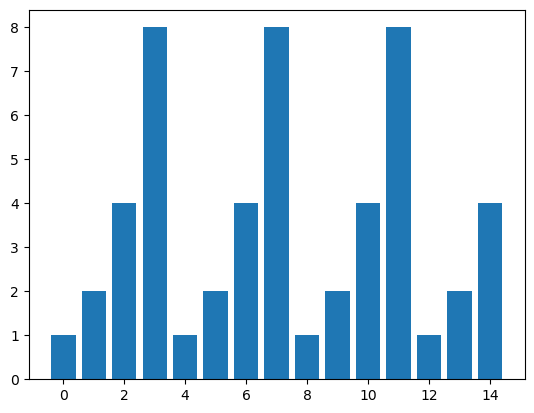

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def powersAModuloN(a,N):
    powers = []
    for i in range(N):
        powers.append(a**i % N)
    return powers

def periodoDeF(a,N):
    powers =powersAModuloN(a,N)
    return powers.index(1,1)


def computeAndDrawPowersAModuloN(a,N):
    powers_a_N = powersAModuloN(a,N)
    print("Periodo: ", periodoDeF(a, N))
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("      x   =", xpoints)
    print(" f(x)_a_N =", ypoints)
    plt.bar(xpoints, ypoints)
    plt.show()

N = 15
a = 2
computeAndDrawPowersAModuloN(a,N)

Periodo:  2
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


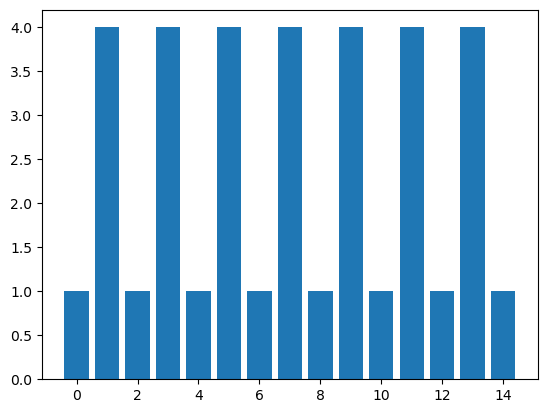

In [43]:
N = 15
a = 4
computeAndDrawPowersAModuloN(a,N)

Periodo:  4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [ 1 13  4  7  1 13  4  7  1 13  4  7  1 13  4]


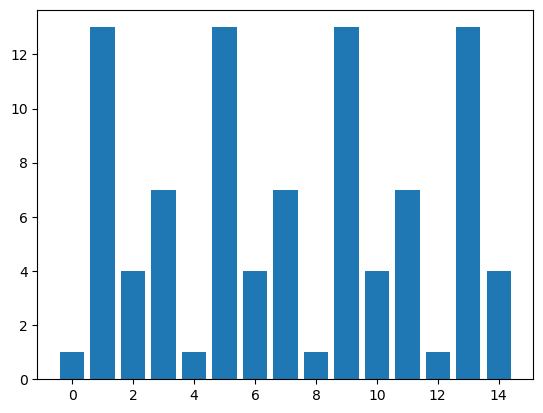

In [44]:
N = 15
a = 13
computeAndDrawPowersAModuloN(a,N)

Periodo:  156
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

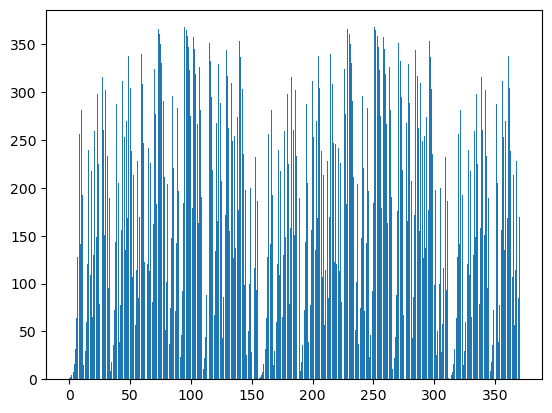

In [47]:
N = 371
a = 2
computeAndDrawPowersAModuloN(a,N)

## A more efficient way of computing $f_{a,N}(x)$

### Can we compute $fa_{a,N}(x)$ more efficiently?

if $a \equiv a' \text{ (mod N)}$ and $a \equiv b' \text{ (mod N)}$, then

$$a \times b \equiv a' \times b' \text{ (mod N)}$$ 

and

$$ (a \times b) \mod N = ((a \mod N) \times (b\mod N)) \mod N$$

From this we can write:

$$a^x \mod N = a^{x-1} \times a \mod N = ((a^{x-1} \mod N) \times (a \mod N))
\mod N$$

where $a \mod N = a$ because $a < N$, then we can simplify further:

$$f_{a,N}(x)=a^x \mod N = ((a^{x-1} \mod N) \times a) \mod N$$

with 
$$f_{a,N}(0) = a^0 \mod N = 1$$

In [42]:
def powersAModuloNRecursive(a,N):
    powers = []
    powers.append(1)

    for i in range(1, N):
        powers.append((powers[i-1] * a) % N)
    return powers

def computeAndDrawRecursivelyPowersAModuloN(a,N):
    powers_a_N = powersAModuloN(a,N)
    print("Periodo: ", periodoDeF(a, N))
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("      x   =", xpoints)
    print(" f(x)_a_N =", ypoints)
    plt.bar(xpoints, ypoints)
    plt.show()

Periodo:  78
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 2

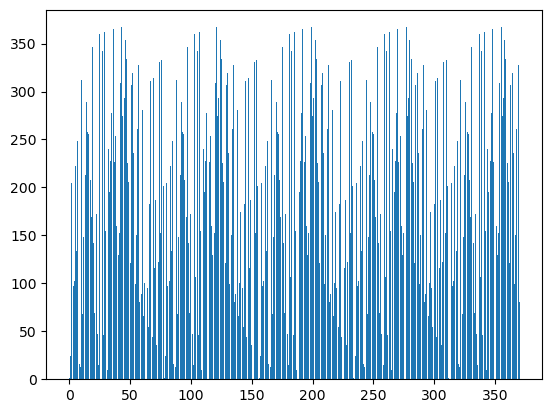

In [6]:
N = 371
a = 24
computeAndDrawRecursivelyPowersAModuloN(a,N)

Periodo:  26
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 2

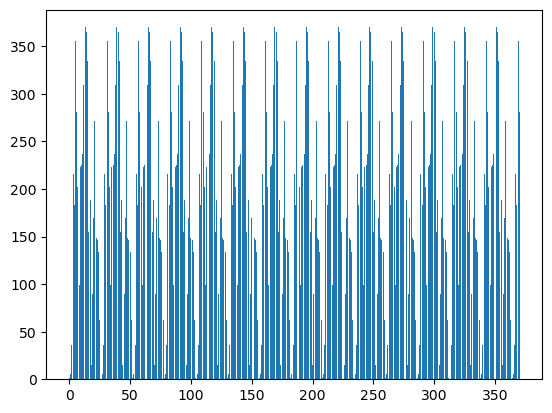

In [7]:
N = 371
a = 6
computeAndDrawRecursivelyPowersAModuloN(a,N)

## Finding the period of $f_{a,N}$

What we need is the period of the function, i.e., we need to find the
smallest $r > 0$ such that

$$ f_{a,N}(r) = a^r \mod N = 1$$
we can do this by simple inspection of the figures.

## Example

In [56]:
N = 371
a = 6

print("Periodo: ", periodoDeF(a, N))

Periodo:  26


A theorem of number theory says that for any co-prime $a≤ N$, the function
$f_{a, N} will output a 1 for some $r < N$. After this, the sequence of numbers
will repeat. 

If $f_{a, N}(r) = 1$, then

$$ f_{a,N}(x+r) = f_{a,N}(x) $$


## From the Period to factors

We need an even number as period. If the period is not even choose another $a$
and repeat the calculation.

With the information of the period $r$ we can now compute the factors follows:

We know that 

$a^r \equiv 1 \text{ ( mod N)}$

subtract 1 from both sides

$a^r -1 \equiv 0 \text{ ( mod N)}$

Thus, $N$ is a divisor of $a^r -1 $

$ N|(a^r -1)$

We know that $x^2 - y^2 = (x+y)(x-y)$, then we can rewrite

$ N|(\sqrt{a^r} + 1)(\sqrt{a^r} - 1)$

or

$ N|(a^\frac{r}{2} + 1)(a^\frac{r}{2} - 1)$   

Note: If $r$ were odd we could not divide by 2 and get an integer

from this equation we now know that any factor of N is also a factor of $(a^\frac{r}{2} + 1)$
or of $(a^\frac{r}{2} - 1)$ or of both.

So we can find the factors looking at:

$GCD(a^\frac{r}{2} + 1, N)$ 

or

$GCD(a^\frac{r}{2} + 1, N)$

GCD can implement the classical Euclidean algorithm.


**IMPORTANT:** $a^\frac{r}{2} \not\equiv -1 \text{ (mod N)}$ if so choose
another $a$.



## Examples

In [ ]:
def findPeriod(a, N):
    powers = powersAModuloNRecursive(a, N)
    return powers.index(1,1)

def gcd(a, b):
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

if __name__ == '__main__':
    N = 371
    a = 24
    powers_a_N = powersAModuloNRecursive(a,N)
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("f_a_N=", powers_a_N)
    period = findPeriod(a, N)
    print("period of f_a_N=", period)

    print("a^(period/2) Mod N = ", (a**(period/2)) % N)
    print("(-1) Mod N= ",  (-1) % N)
    print("factor1= ", gcd((a**(period/2)) + 1, N))
    print("factor2= ", gcd((a**(period/2)) - 1, N))

    print((a**(period/2)) +1)
    print("gcd(161,371)=",gcd(161,371))
    print("We can do this because 160 congruent with 24^39")

    plt.bar(xpoints, ypoints)
    plt.show()

NameError: name 'powersAModuloNRecursive' is not defined

## Exercise
Compute the factors of $N=247$ using $a=2$

Periodo encontrado: 36
Cálculo intermedio: 2^(periodo/2) mod 247 = 77
los factores encontrados de 247 fueron: 13 y 19
Verificación de los factores encontrados: 13 * 19 = 247


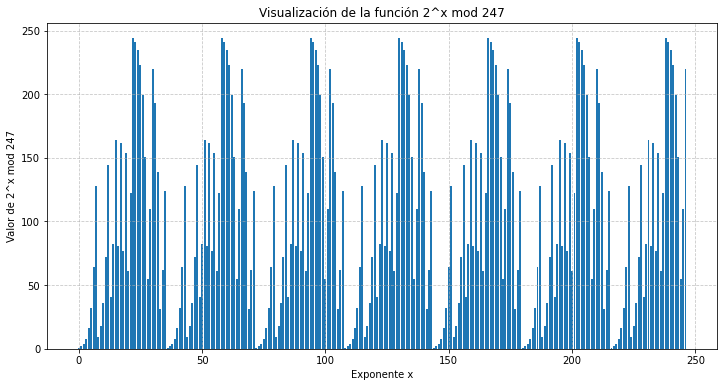

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_powers_mod(a, N):
    """
    Calcula la secuencia de potencias de 'a' módulo 'N' para valores de x desde 0 hasta N-1.

    Parámetros:
    a (int): Base de la potencia.
    N (int): Módulo para la operación.

    Retorna:
    list[int]: Lista con los valores de a^x mod N para x en [0, N-1].
    """
    return [pow(a, x, N) for x in range(N)]

def find_period(powers):
    """
    Encuentra el período de la secuencia modular buscando el índice del segundo 1.

    Parámetros:
    powers (list[int]): Secuencia de valores calculados a^x mod N.

    Retorna:
    int: El periodo r, es decir, el primer índice > 0 tal que powers[r] == 1.
         Retorna -1 si no se encuentra ningún periodo válido.
    """
    for i in range(1, len(powers)):
        if powers[i] == 1:
            return i
    return -1

def calcula_maximocomundivisor(a, b):
    """
    Calcula el máximo común divisor (MCD) de dos números enteros usando el algoritmo de Euclides.

    Parámetros:
    a (int): Primer número.
    b (int): Segundo número.

    Retorna:
    int: El máximo común divisor de a y b.
    """
    while b != 0:
        a, b = b, a % b
    return a

def factorize(N, a):
    """
    Intenta factorizar el número compuesto N usando la parte clásica del algoritmo de Shor.

    Procedimiento:
    - Calcula la secuencia de potencias modulares.
    - Busca el periodo r de la función a^x mod N.
    - Verifica que r sea par para poder continuar.
    - Calcula x = a^(r/2) mod N.
    - Obtiene factores candidatos como los MCDs de (x+1, N) y (x-1, N).

    Parámetros:
    N (int): Número compuesto a factorizar.
    a (int): Base elegida para el cálculo de potencias.

    Retorna:
    tuple: Dos factores no triviales de N si se encuentran, o (None, None) en caso contrario.
    """
    powers = compute_powers_mod(a, N)
    period = find_period(powers)
    
    if period == -1:
        print("No se encontró un periodo válido en la secuencia.")
        return None, None
    
    print(f"Periodo encontrado: {period}")
    
    if period % 2 != 0:
        print("El periodo es impar, no se puede factorizar con esta base.")
        return None, None
    
    x = pow(a, period//2, N)
    print(f"Cálculo intermedio: {a}^(periodo/2) mod {N} = {x}")
    
    factor1 = calcula_maximocomundivisor(x + 1, N)
    factor2 = calcula_maximocomundivisor(x - 1, N)
    
    if factor1 == 1 or factor1 == N or factor2 == 1 or factor2 == N:
        print("No se encontraron factores no triviales con esta base y periodo.")
        return None, None
    
    return factor1, factor2

def plot_function(a, N, powers):
    """
    Genera un gráfico de barras para visualizar la función modular a^x mod N.

    Parámetros:
    a (int): Base utilizada en la función.
    N (int): Módulo.
    powers (list[int]): Secuencia de valores de a^x mod N para x en [0, N-1].

    Efecto:
    Muestra una gráfica que permite observar la periodicidad de la función modular.
    """
    plt.figure(figsize=(12, 6))
    plt.bar(range(N), powers)
    plt.title(f'Visualización de la función {a}^x mod {N}')
    plt.xlabel('Exponente x')
    plt.ylabel(f'Valor de {a}^x mod {N}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

if __name__ == '__main__':
    N = 247   # Número compuesto que se desea factorizar
    a = 2     # Base elegida para la factorización
    
    # Ejecuta la factorización usando el algoritmo clásico de Shor
    factor1, factor2 = factorize(N, a)
    
    if factor1 and factor2:
        print(f"los factores encontrados de {N} fueron: {factor1} y {factor2}")
        print(f"Verificación de los factores encontrados: {factor1} * {factor2} = {factor1 * factor2}")
    else:
        print("No se logró hacer el calculo de la factorizacion del número con la base que se seleccionó")
    
    # Genera la visualización de la función modular para analizar su comportamiento
    powers = compute_powers_mod(a, N)
    plot_function(a, N, powers)


# Factorización Clásica usando el Algoritmo de Shor

Este documento explica paso a paso cómo se puede factorizar un número compuesto \( N \) usando la parte clásica del algoritmo de Shor.

---

## Objetivo

La idea es factorizar el número \( N = 247 \) usando una base \( a = 2 \), estudiando la función:

$$
f(x) = a^x \bmod N
$$

---

## Paso 1: Calcular las Potencias Módulo \( N \)

Primero, calculamos todos los valores de \( a^x \bmod N \) para \( x \) desde 0 hasta \( N-1 \). Esta serie de números tiene un patrón que se repite cada cierto tiempo, y eso es lo que nos interesa.

---

## Paso 2: Encontrar el Período

Después, buscamos el período \( r \), que es el número más pequeño mayor que cero para el que:

$$
a^r \bmod N = 1
$$

Este valor nos dice cada cuántos pasos la función vuelve a empezar.

---

## Paso 3: Verificar que el Período sea Par

Para que el método funcione, el período \( r \) tiene que ser un número par. Si no lo es, hay que intentar con otra base \( a \).

---

## Paso 4: Calcular un Valor Intermedio

Si el período es par, calculamos:

$$
x = a^{r/2} \bmod N
$$

Este número nos va a ayudar a encontrar los factores.

---

## Paso 5: Calcular los Factores

Luego, usamos el máximo común divisor para calcular:

$$
\text{factor}_1 = \gcd(x + 1, N)
$$  
$$
\text{factor}_2 = \gcd(x - 1, N)
$$

Si estos factores no son ni 1 ni \( N \), entonces hemos encontrado los factores verdaderos de \( N \).

---

## Paso 6: Visualización (Opcional)

También se puede hacer un gráfico de la función \( a^x \bmod N \) para ver claramente ese patrón que se repite y entender mejor cómo funciona.

---

## Resultado Final

Si todo sale bien, conseguimos dos números primos \( p \) y \( q \) que multiplicados dan \( N \):

$$
p \times q = N
$$

Esta idea de usar la periodicidad para factorizar números es lo que hace posible el algoritmo cuántico de Shor.


# The quantum algorithm

$a$ is always less than $N$ so we need $n=log_2 N$ qbits as output.

We need to evaluate $f_{a,N}$ in at least $N^2$ values of $x$, so $m = log_2 N^2
= 2 log_2 N = 2n$

![Shor's algorithm!](images/shoralgorithm.jpg)

$\ket{\psi_0} = \ket{\boldsymbol{0_m}, \boldsymbol{0_n}}$

$\ket{\psi_1} = \frac{1}{\sqrt{2^m}}\sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, \boldsymbol{0_n}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, f_{a,N}\boldsymbol{x}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, a^{\boldsymbol{x}}
\mod N}$

# Shor’s algorithm: 
Input: A positive integer N with n = [log2 N]. 

Output: A factor p of N if it exists. 

Step 1. Use a polynomial algorithm to determine if N is prime or a power of
prime. If it is a prime, declare that it is and exit. If it is a power of a
prime number, declare that it is and exit. 

Step 2. Randomly choose an integer a such that 1 < a< N. Perform Euclid’s
algorithm to determine GCD(a, N). If the GCD is not 1, then return it and exit. 

Step 3. Use quantum circuit (6.166) to find a period r. 

Step 4. If r is odd or if ar ≡ −1 Mod N, then return to Step 2 and choose
another a. 

Step 5. Use Euclid’s algorithm to calculate  and . Return at least one of the nontrivial solutions.



## Further Reading

For those interested in diving deeper into Shor's algorithm and quantum computing, here are some resources:

- Yanofsky, Noson S.; Mannucci, Mirco A.. Quantum Computing for Computer Scientists (English Edition) (p. 217). Cambridge University Press. Kindle Edition. 
- Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information.
- Kaye, P., Laflamme, R., & Mosca, M. (2007). An Introduction to Quantum Computing.
- [Qiskit Documentation](https://qiskit.org/documentation/)
